# ガウス分布のKLダイバージェンス

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def gaussian1d(x, mu, sigma):
    y = 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return y

def gaussian1d_KLdivergence(mu, mu_hat, sigma, sigma_hat):
    A = ((mu - mu_hat)**2 + sigma_hat**2) / (2*sigma_hat**2)
    B = np.log(sigma/sigma_hat) 
    C = -1/2
    y = A + B + C
    return y

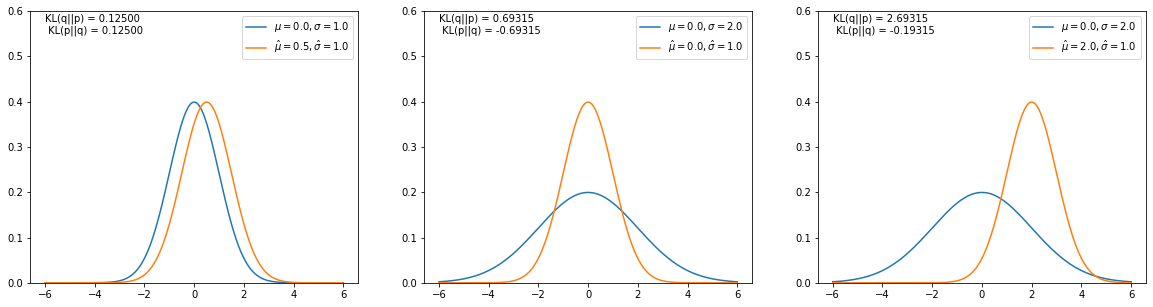

In [39]:
mu = [0, 0, 0]
sigma = [1, 2, 2]
mu_hat = [0.5, 0, 2]
sigma_hat = [1, 1, 1]

dx = 0.01
x = np.arange(-6, 6 + dx, dx)

plt.figure(figsize=(20, 5))

for i in range(3):
    px = gaussian1d(x, mu[i], sigma[i])
    qx = gaussian1d(x, mu_hat[i], sigma_hat[i])

    KLqp = gaussian1d_KLdivergence(mu[i], mu_hat[i], sigma[i], sigma_hat[i])
    KLpq = gaussian1d_KLdivergence(mu_hat[i], mu[i], sigma_hat[i], sigma[i])
    
    plt.subplot(1, 3, i+1)
    plt.plot(x, px, label="$\mu = %.1f, \sigma = %.1f$" % (mu[i], sigma[i]))
    plt.plot(x, qx, label="$\hat{\mu} = %.1f, \hat{\sigma} = %.1f$" % (mu_hat[i], sigma_hat[i]))
    plt.text(-6, 0.55, 'KL(q||p) = %.5f \n KL(p||q) = %.5f' % (KLqp, KLpq))
    plt.ylim(0, 0.6)
    plt.legend(loc='upper right')